In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregar das bases

arrecadacao = pd.read_csv('Arrecadacao.csv', sep=',')
arrecadacao.head()

,sg_uf,ano_arrecadacao,mes_arrecadacao,co_tipo_arrecadacao,va_arrecadacao,DATA_BASE
0,AC,2018,1,119,102629.99,2018-01-01 00:00:00
1,AC,2018,1,129,13408881.31,2018-01-01 00:00:00
2,AC,2018,1,131,15826506.41,2018-01-01 00:00:00
3,AC,2018,1,132,23482420.87,2018-01-01 00:00:00
4,AC,2018,1,133,549937.42,2018-01-01 00:00:00


In [3]:
criminalidade = pd.read_excel('criminalidade.xlsx')
criminalidade.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2015,janeiro,6
1,Acre,Furto de veículo,2015,janeiro,0
2,Acre,Homicídio doloso,2015,janeiro,13
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0


In [4]:
siglas = pd.read_excel('siglas.xls')
siglas.head()

,TABELA III,Unnamed: 1,Unnamed: 2
0,UNIDADES DA FEDERAÇÃO E CÓDIGOS DDD,NaN,NaN
1,NaN,NaN,NaN
2,ESTADOS,SIGLA,CÓDIGOS DDD
3,ACRE,AC,068
4,ALAGOAS,AL,082


In [5]:
# Dropar primeiras 2 linhas
siglas = siglas.drop([0,1])

# Colocar primeira linha atual como cabeçalho
cabecalho = siglas.iloc[0]
siglas = siglas[1:]
siglas.columns = cabecalho

siglas

2,ESTADOS,SIGLA,CÓDIGOS DDD
3,ACRE,AC,068
4,ALAGOAS,AL,082
5,AMAPÁ,AP,096
6,AMAZONAS,AM,"092, 097"
7,BAHIA,BA,"071, 072, 073, 074, 075, 077"
8,CEARÁ,CE,"085, 088"
9,DISTRITO FEDERAL,DF,061
10,ESPÍRITO SANTO,ES,"027, 028"
11,GOIÁS,GO,"062, 064"
12,MARANHÃO,MA,"098, 099"


In [6]:
# Dropar colunas não importantes
siglas = siglas[['ESTADOS', 'SIGLA']]

siglas

2,ESTADOS,SIGLA
3,ACRE,AC
4,ALAGOAS,AL
5,AMAPÁ,AP
6,AMAZONAS,AM
7,BAHIA,BA
8,CEARÁ,CE
9,DISTRITO FEDERAL,DF
10,ESPÍRITO SANTO,ES
11,GOIÁS,GO
12,MARANHÃO,MA


In [7]:
# Transformar nomes dos estados em formato título ("Rio Grande Do Sul")
siglas['ESTADOS'] = siglas['ESTADOS'].str.title()

siglas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2,ESTADOS,SIGLA
3,Acre,AC
4,Alagoas,AL
5,Amapá,AP
6,Amazonas,AM
7,Bahia,BA
8,Ceará,CE
9,Distrito Federal,DF
10,Espírito Santo,ES
11,Goiás,GO
12,Maranhão,MA


In [8]:
# Juntar bases siglas com arrecadacao
arrecadacao = arrecadacao.set_index('sg_uf').join(siglas.set_index('SIGLA'))

arrecadacao.head()

,ano_arrecadacao,mes_arrecadacao,co_tipo_arrecadacao,va_arrecadacao,DATA_BASE,ESTADOS
AC,2018,1,119,102629.99,2018-01-01 00:00:00,Acre
AC,2018,1,129,13408881.31,2018-01-01 00:00:00,Acre
AC,2018,1,131,15826506.41,2018-01-01 00:00:00,Acre
AC,2018,1,132,23482420.87,2018-01-01 00:00:00,Acre
AC,2018,1,133,549937.42,2018-01-01 00:00:00,Acre


In [9]:
# Selecionar ano específico de 2019
arrecadacao = arrecadacao[arrecadacao['ano_arrecadacao'] == 2019]

arrecadacao.head()

,ano_arrecadacao,mes_arrecadacao,co_tipo_arrecadacao,va_arrecadacao,DATA_BASE,ESTADOS
AC,2019,1,119,111054.37,2019-01-01 00:00:00,Acre
AC,2019,1,129,12958699.78,2019-01-01 00:00:00,Acre
AC,2019,1,131,18741853.79,2019-01-01 00:00:00,Acre
AC,2019,1,132,24552013.07,2019-01-01 00:00:00,Acre
AC,2019,1,133,344466.64,2019-01-01 00:00:00,Acre


In [10]:
# Selecionar ano específico de 2019
criminalidade = criminalidade[criminalidade['Ano'] == 2019]

criminalidade.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
432,Acre,Estupro,2019,janeiro,33
433,Acre,Furto de veículo,2019,janeiro,46
434,Acre,Homicídio doloso,2019,janeiro,32
435,Acre,Lesão corporal seguida de morte,2019,janeiro,0
436,Acre,Roubo a instituição financeira,2019,janeiro,1


In [11]:
# Selecionar colunas importantes de arrecadação
arrecadacao = arrecadacao[['va_arrecadacao', 'ESTADOS']]

arrecadacao.head()

,va_arrecadacao,ESTADOS
AC,111054.37,Acre
AC,12958699.78,Acre
AC,18741853.79,Acre
AC,24552013.07,Acre
AC,344466.64,Acre


In [12]:
# Arrecadação total por estado
arrecadacao = arrecadacao.groupby(['ESTADOS']).sum()

arrecadacao.head()

,va_arrecadacao
ESTADOS,
Acre,5.696393e+09
Alagoas,1.683318e+10
Amapá,4.877823e+09
Amazonas,4.023922e+10
Bahia,1.103432e+11


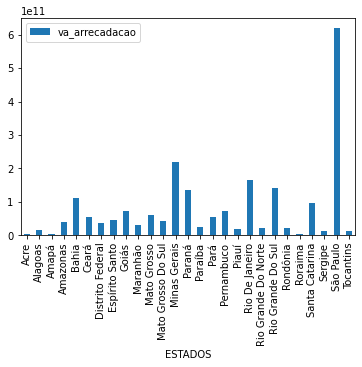

In [13]:
# Plot arrecadação por estado
arrecadacao.plot.bar()

In [14]:
# Selecionar colunas importantes de crimilidade
criminalidade = criminalidade[['UF',	'Tipo Crime',	'Ocorrências']]

criminalidade.head()

,UF,Tipo Crime,Ocorrências
432,Acre,Estupro,33
433,Acre,Furto de veículo,46
434,Acre,Homicídio doloso,32
435,Acre,Lesão corporal seguida de morte,0
436,Acre,Roubo a instituição financeira,1


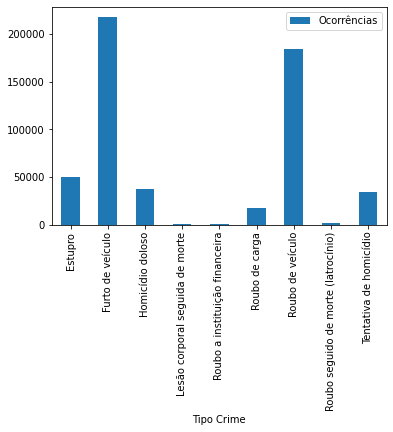

In [15]:
# Plot tipo de crime total do país
criminalidade.groupby(['Tipo Crime']).sum().plot.bar()

In [16]:
# Transformar nomes dos estados em formato título ("Rio Grande Do Sul")
criminalidade['UF'] = criminalidade['UF'].str.title()

In [17]:
# Juntar criminalidade com arrecadacao
criminalidade = arrecadacao.join(criminalidade.set_index('UF'))

In [18]:
# Remover UF do index
criminalidade.reset_index(level=0, inplace=True)

criminalidade

,index,va_arrecadacao,Tipo Crime,Ocorrências
0,Acre,5.696393e+09,Estupro,33
1,Acre,5.696393e+09,Furto de veículo,46
2,Acre,5.696393e+09,Homicídio doloso,32
3,Acre,5.696393e+09,Lesão corporal seguida de morte,0
4,Acre,5.696393e+09,Roubo a instituição financeira,1
...,...,...,...,...
2884,Tocantins,1.266911e+10,Lesão corporal seguida de morte,0
2885,Tocantins,1.266911e+10,Roubo a instituição financeira,0
2886,Tocantins,1.266911e+10,Roubo de carga,0
2887,Tocantins,1.266911e+10,Roubo de veículo,51


In [19]:
# Trocar nome de coluna
criminalidade['UF'] = criminalidade['index']
criminalidade=criminalidade.drop(columns=['index'])

criminalidade

,va_arrecadacao,Tipo Crime,Ocorrências,UF
0,5.696393e+09,Estupro,33,Acre
1,5.696393e+09,Furto de veículo,46,Acre
2,5.696393e+09,Homicídio doloso,32,Acre
3,5.696393e+09,Lesão corporal seguida de morte,0,Acre
4,5.696393e+09,Roubo a instituição financeira,1,Acre
...,...,...,...,...
2884,1.266911e+10,Lesão corporal seguida de morte,0,Tocantins
2885,1.266911e+10,Roubo a instituição financeira,0,Tocantins
2886,1.266911e+10,Roubo de carga,0,Tocantins
2887,1.266911e+10,Roubo de veículo,51,Tocantins


UF: Acre Índice de arrecadação: 0.0 Valor de arrecadação: 5696392886.309999


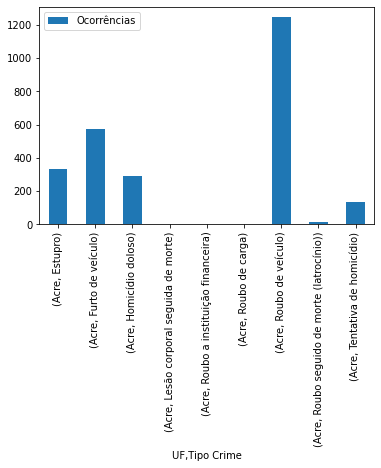

UF: Alagoas Índice de arrecadação: 0.02 Valor de arrecadação: 16833180416.800003


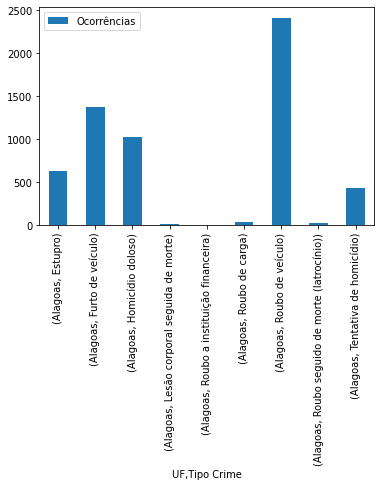

UF: Amapá Índice de arrecadação: 0.0 Valor de arrecadação: 4877823204.880001


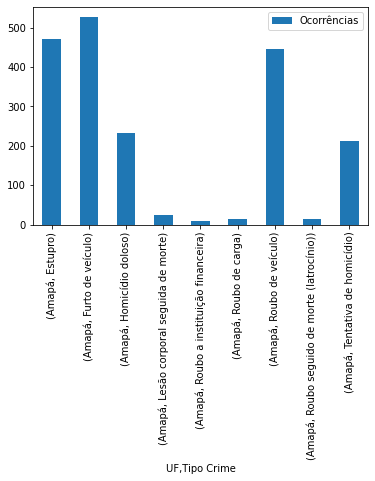

UF: Amazonas Índice de arrecadação: 0.06 Valor de arrecadação: 40239217699.07001


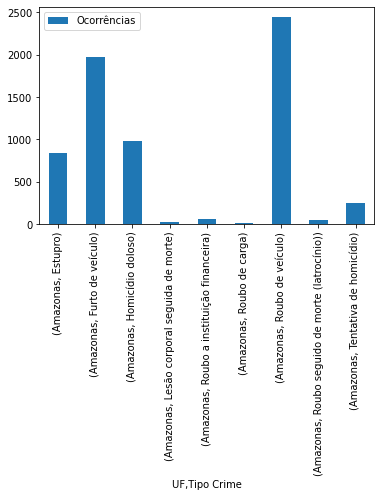

UF: Bahia Índice de arrecadação: 0.17 Valor de arrecadação: 110343234611.29004


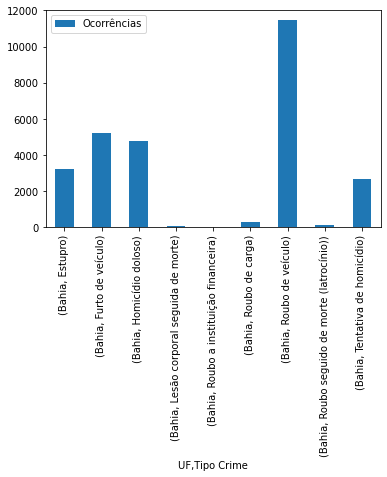

UF: Ceará Índice de arrecadação: 0.08 Valor de arrecadação: 54397780833.43003


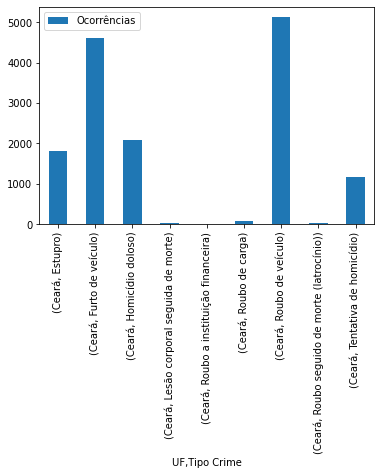

UF: Distrito Federal Índice de arrecadação: 0.05 Valor de arrecadação: 35953785194.11001


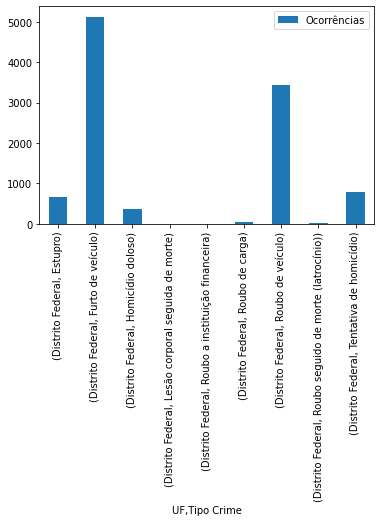

UF: Espírito Santo Índice de arrecadação: 0.07 Valor de arrecadação: 46699906197.8


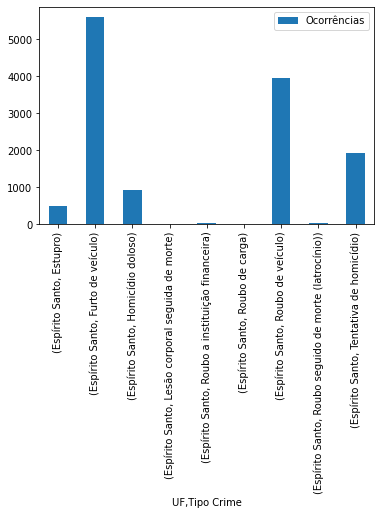

UF: Goiás Índice de arrecadação: 0.11 Valor de arrecadação: 72119890805.13


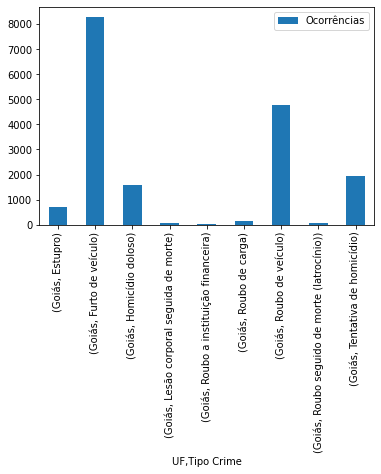

UF: Maranhão Índice de arrecadação: 0.04 Valor de arrecadação: 32358922122.569996


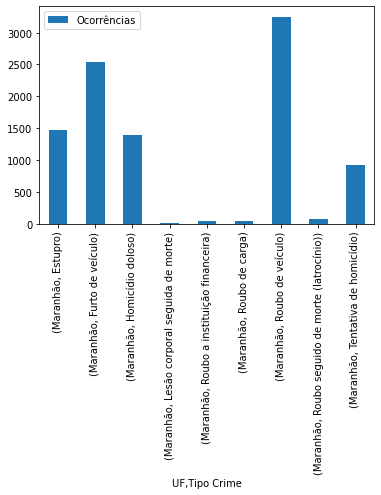

UF: Mato Grosso Índice de arrecadação: 0.09 Valor de arrecadação: 60969618482.18997


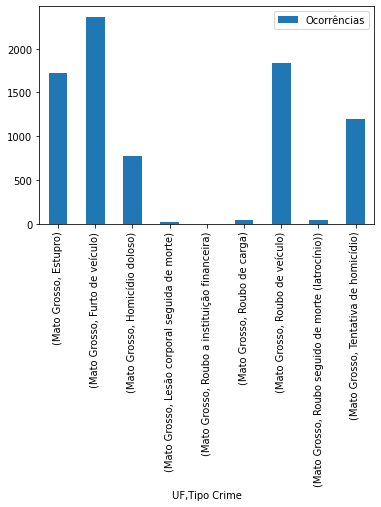

UF: Mato Grosso Do Sul Índice de arrecadação: 0.06 Valor de arrecadação: 43209904371.13


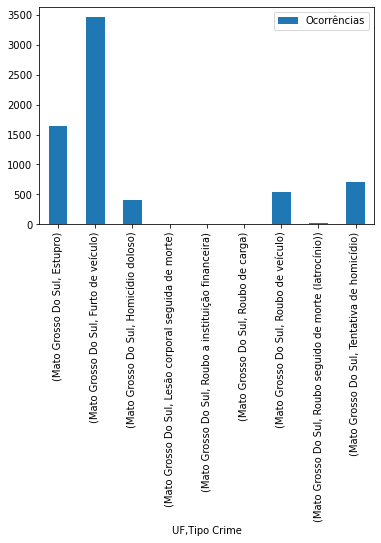

UF: Minas Gerais Índice de arrecadação: 0.35 Valor de arrecadação: 220310455245.14996


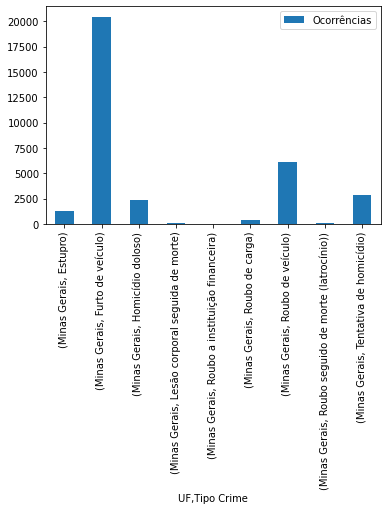

UF: Paraná Índice de arrecadação: 0.21 Valor de arrecadação: 134541936706.03995


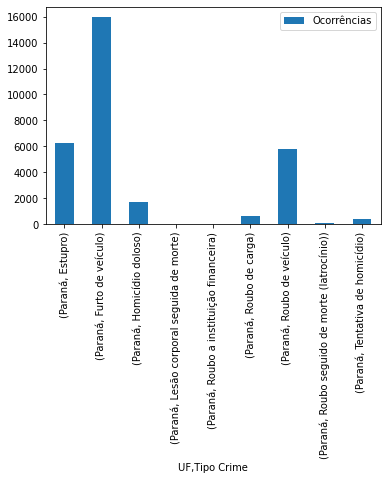

UF: Paraíba Índice de arrecadação: 0.03 Valor de arrecadação: 24062103183.58001


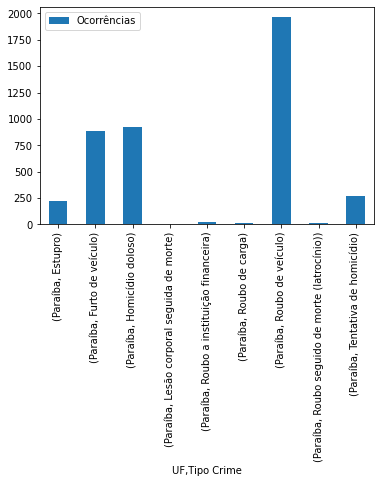

UF: Pará Índice de arrecadação: 0.08 Valor de arrecadação: 55544302314.0


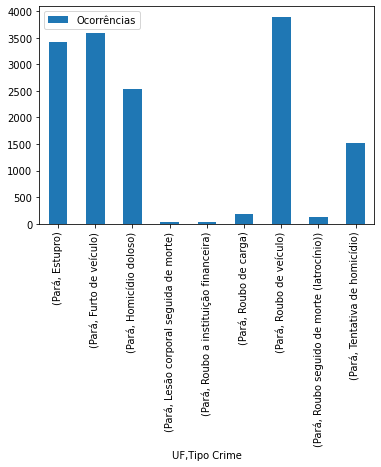

UF: Pernambuco Índice de arrecadação: 0.11 Valor de arrecadação: 73680738906.90997


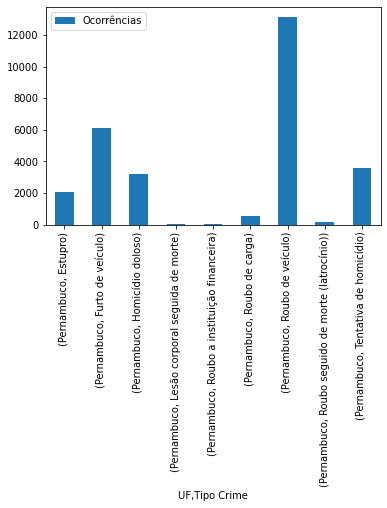

UF: Piauí Índice de arrecadação: 0.02 Valor de arrecadação: 18974856550.580013


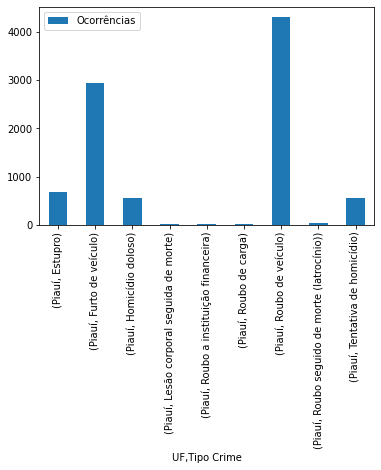

UF: Rio De Janeiro Índice de arrecadação: 0.26 Valor de arrecadação: 165757983102.31998


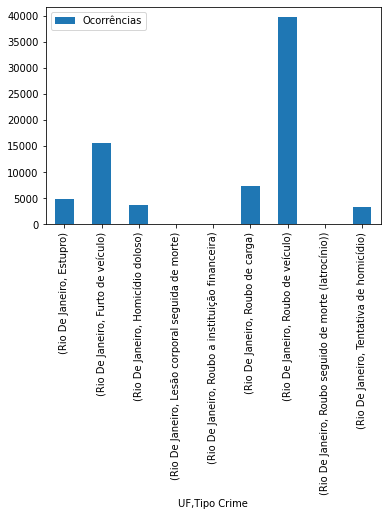

UF: Rio Grande Do Norte Índice de arrecadação: 0.03 Valor de arrecadação: 23251091069.35


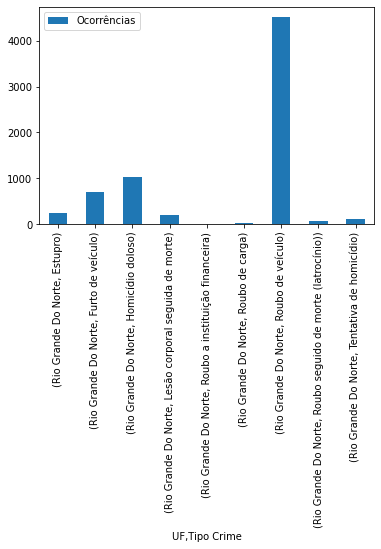

UF: Rio Grande Do Sul Índice de arrecadação: 0.22 Valor de arrecadação: 141320858805.2399


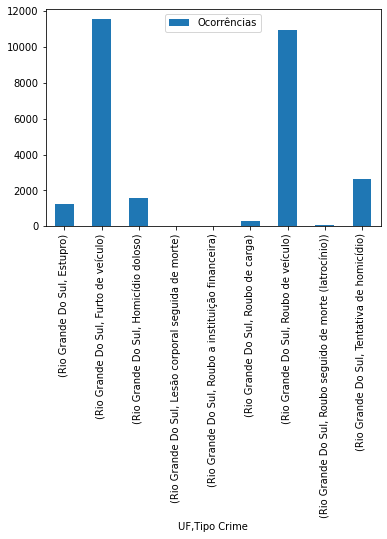

UF: Rondônia Índice de arrecadação: 0.03 Valor de arrecadação: 20871591977.590008


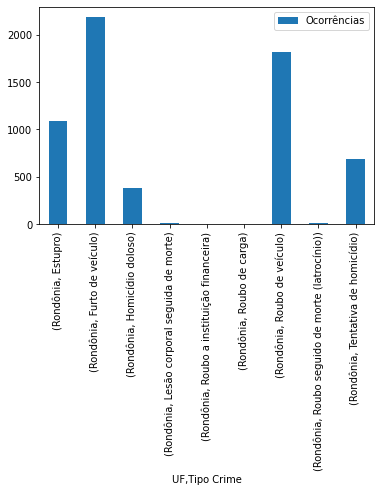

UF: Roraima Índice de arrecadação: 0.0 Valor de arrecadação: 4829460019.280002


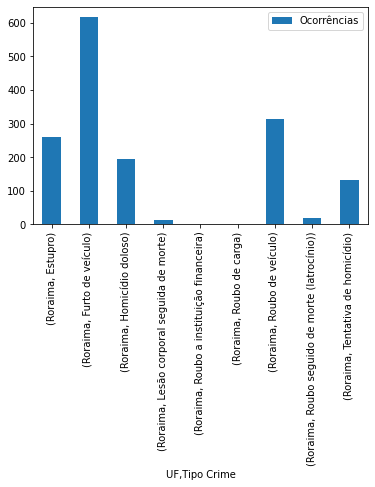

UF: Santa Catarina Índice de arrecadação: 0.15 Valor de arrecadação: 97854498126.55997


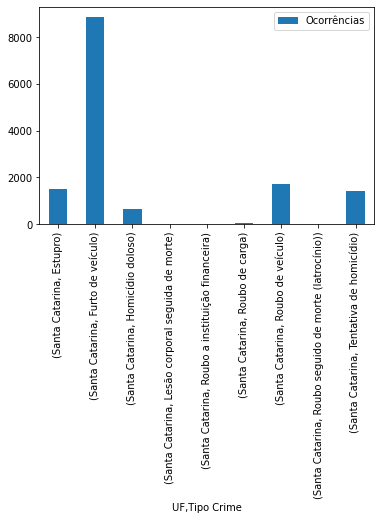

UF: Sergipe Índice de arrecadação: 0.02 Valor de arrecadação: 14180006686.0


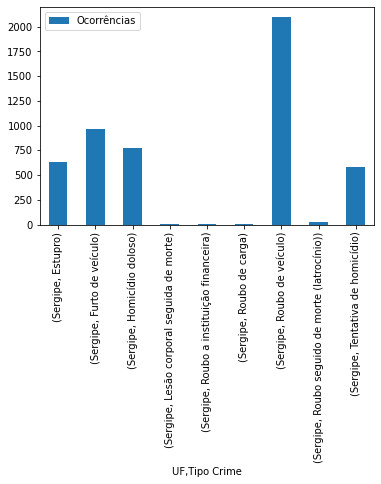

UF: São Paulo Índice de arrecadação: 1.0 Valor de arrecadação: 618729217912.9004


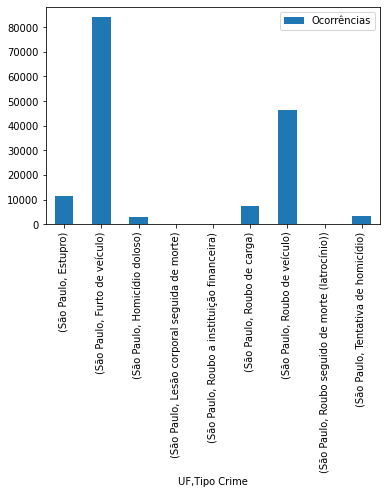

UF: Tocantins Índice de arrecadação: 0.01 Valor de arrecadação: 12669112312.42


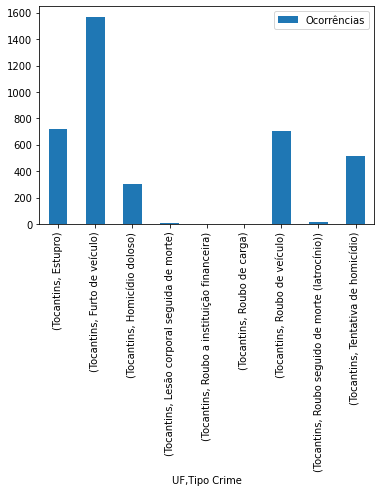

In [20]:
# Pegar valores específicos de criminilidade
crim = criminalidade[['UF', 'Tipo Crime', 'Ocorrências']]

# Criar valores para indice de arrecadação
min = criminalidade['va_arrecadacao'].min()
var = criminalidade['va_arrecadacao'].max()-min

# Pegar valores de arrecadação
arr = arrecadacao.copy()
arr.reset_index(level=0, inplace=True)

# Para cada estado do país gerar gráfico
for uf in crim['UF'].unique():
  # Gerar valores
  v = crim[crim['UF'] == uf].groupby(['UF', 'Tipo Crime']).sum()
  valor = arr[arr['ESTADOS'] == uf]['va_arrecadacao'].iloc[0]
  ind = (valor-min)/var

  # Desenhar
  print("UF: {} Índice de arrecadação: {} Valor de arrecadação: {}".format(uf, round(ind, 2), valor))
  v.plot.bar()
  plt.show()

In [21]:
# Soma de ocorrências por UF
criminalidade[['UF', 'Ocorrências']].groupby(['UF']).sum()

,Ocorrências
UF,
Acre,2598
Alagoas,5947
Amapá,1949
Amazonas,6632
Bahia,27826
Ceará,14971
Distrito Federal,10449
Espírito Santo,13023
Goiás,17587


In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import metrics
import scipy.cluster.hierarchy as shc

In [23]:
# Transformar colunas categóricas em atributos quantitativos
criminalidade_sem_uf = pd.get_dummies(criminalidade, columns=['Tipo Crime'])
criminalidade_sem_uf = criminalidade_sem_uf.drop(columns=['UF'])

In [24]:
criminalidade_sem_uf

,va_arrecadacao,Ocorrências,Tipo Crime_Estupro,Tipo Crime_Furto de veículo,Tipo Crime_Homicídio doloso,Tipo Crime_Lesão corporal seguida de morte,Tipo Crime_Roubo a instituição financeira,Tipo Crime_Roubo de carga,Tipo Crime_Roubo de veículo,Tipo Crime_Roubo seguido de morte (latrocínio),Tipo Crime_Tentativa de homicídio
0,5.696393e+09,33,1,0,0,0,0,0,0,0,0
1,5.696393e+09,46,0,1,0,0,0,0,0,0,0
2,5.696393e+09,32,0,0,1,0,0,0,0,0,0
3,5.696393e+09,0,0,0,0,1,0,0,0,0,0
4,5.696393e+09,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2884,1.266911e+10,0,0,0,0,1,0,0,0,0,0
2885,1.266911e+10,0,0,0,0,0,1,0,0,0,0
2886,1.266911e+10,0,0,0,0,0,0,1,0,0,0
2887,1.266911e+10,51,0,0,0,0,0,0,1,0,0


In [25]:
# Testar grupos no modelo K Means
for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(criminalidade_sem_uf)
  score = metrics.silhouette_score(criminalidade_sem_uf, km.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.8967
Para k=3 o valor Silhoutte foi de 0.7315
Para k=4 o valor Silhoutte foi de 0.6270
Para k=5 o valor Silhoutte foi de 0.6489
Para k=6 o valor Silhoutte foi de 0.6691
Para k=7 o valor Silhoutte foi de 0.6881
Para k=8 o valor Silhoutte foi de 0.7154
Para k=9 o valor Silhoutte foi de 0.7277


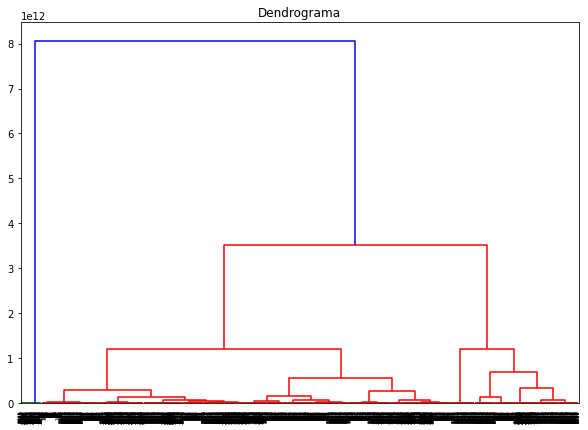

In [26]:
# Plotar dendograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
cluster_alg = shc.linkage(criminalidade_sem_uf, method='ward',)
dend = shc.dendrogram(cluster_alg)

In [27]:
# Testar grupos no modelo Agglomerative Clustering
for k in range(2, 12):
  ac = AgglomerativeClustering(n_clusters=k)
  ac.fit(criminalidade_sem_uf)
  score = metrics.silhouette_score(criminalidade_sem_uf, ac.labels_, metric='euclidean')
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

Para k=2 o valor Silhoutte foi de 0.8967
Para k=3 o valor Silhoutte foi de 0.7315
Para k=4 o valor Silhoutte foi de 0.7196
Para k=5 o valor Silhoutte foi de 0.6531
Para k=6 o valor Silhoutte foi de 0.6638
Para k=7 o valor Silhoutte foi de 0.6881
Para k=8 o valor Silhoutte foi de 0.7154
Para k=9 o valor Silhoutte foi de 0.7277
Para k=10 o valor Silhoutte foi de 0.7595
Para k=11 o valor Silhoutte foi de 0.7661
